# Loading In From The Igor Pro Interface

Because Igor Pro version 9 is nice hdf5 directory this makes loading clustered data more
easy than it once was.


In [5]:
from scipy.special import erf, dawsn
import pandas as pd
import numpy as np
import periodictable as pt

ZNPC_FORMULA = "C32H16N8Zn1"
# Approximate density for ZnPc - use a more accurate value if available
MATERIAL_DENSITY_G_CM3 = 1

clusters = [
    284.22241,
    285.06207,
    285.50906,
    286.10214,
    286.74417,
    287.07013,
    287.61008,
    288.15906,
    288.56741,
    288.87015,
    289.379,
    290.20575,
    291.74933,
    293.49863,
    295.36945,
    298.51926,
    303.15958,
    307.15552,
    313.49893,
]
amp = [
    0.013883271,
    0.02300393,
    0.0071607064,
    0.0042806831,
    0.0052673123,
    0.0069674319,
    0.0037899793,
    0.0045592617,
    0.0020791758,
    0.0062418138,
    0.0080258828,
    0.011401098,
    0.011617258,
    0.012487763,
    0.012987279,
    0.023565691,
    0.030651854,
    0.013345404,
    0.0072841011,
]
theta = [
    0.10986175,
    0.0099264169,
    0.010565368,
    2.0037124,
    9.6967077,
    1.749457,
    29.972015,
    28.981489,
    29.668104,
    9.5790854,
    22.045391,
    21.47336,
    52.5131,
    81.928589,
    84.008263,
    89.63591,
    89.614853,
    87.755257,
    40.949398,
]
wid = [
    0.68722975,
    0.63484478,
    0.78866369,
    0.73099136,
    0.68295568,
    0.57366711,
    0.60283935,
    0.64840037,
    0.51148295,
    0.6116873,
    0.87610269,
    1.0846148,
    2.0258183,
    2.5669038,
    3.1504252,
    5.0322709,
    6.6183276,
    7.6663713,
    9.2411699,
]
ip = [291.96863, 290.45758, 290.19235, 290.1377]
ip.sort()


fit = pd.DataFrame(
    {
        "energy": clusters,
        "amp": amp,
        "theta": theta,
        "wid": wid,
    }
)
# calculate the in plane, and out of plane tdm components
fit["osip"] = fit["amp"] * np.sin(np.radians(fit["theta"]))
fit["osz"] = fit["amp"] * np.cos(np.radians(fit["theta"]))

# calculate the xx components from the osip assuming the geometric mean of the x and y components
fit["osx"] = fit["osip"] * (1 / np.sqrt(2))
fit["osy"] = fit["osip"] * (1 / np.sqrt(2))
display(fit)


def peak(en, center, width, amplitude):
    # convert width from fwhm to sigma
    sigma = width / (2 * np.sqrt(2 * np.log(2)))
    beta = (
        amplitude
        * np.exp(-((en - center) ** 2) / (2 * sigma**2))
        / (sigma * np.sqrt(2 * np.pi))
    )
    # delta = np.sqrt(2) / sigma * dawsn((en - center) / (np.sqrt(2) * sigma))
    return beta


def ionization(en, ip, width=1):
    # a sigmoid function to model the ionization potential
    return 1 / 2 * (1 + erf((en - ip) / (np.sqrt(2) * width)))


energy_range = np.linspace(250, 330, 1000)


,energy,amp,theta,wid,osip,osz,osx,osy
0,284.22241,0.013883,0.109862,0.687230,0.000027,0.013883,1.882350e-05,1.882350e-05
1,285.06207,0.023004,0.009926,0.634845,0.000004,0.023004,2.818103e-06,2.818103e-06
2,285.50906,0.007161,0.010565,0.788664,0.000001,0.007161,9.336903e-07,9.336903e-07
3,286.10214,0.004281,2.003712,0.730991,0.000150,0.004278,1.058333e-04,1.058333e-04
4,286.74417,0.005267,9.696708,0.682956,0.000887,0.005192,6.273365e-04,6.273365e-04
5,287.07013,0.006967,1.749457,0.573667,0.000213,0.006964,1.504080e-04,1.504080e-04
6,287.61008,0.003790,29.972015,0.602839,0.001893,0.003283,1.338826e-03,1.338826e-03
7,288.15906,0.004559,28.981489,0.648400,0.002209,0.003988,1.562059e-03,1.562059e-03
8,288.56741,0.002079,29.668104,0.511483,0.001029,0.001807,7.277120e-04,7.277120e-04
9,288.87015,0.006242,9.579085,0.611687,0.001039,0.006155,7.344668e-04,7.344668e-04


# Loading in Experimental Data and Normalizing to calculate Beta


In [6]:
exp_df = pd.read_csv("exp.csv")
steps = pd.read_csv("steps(in).csv")
exp_df.describe(), steps.describe()

FileNotFoundError: [Errno 2] No such file or directory: 'steps(in).csv'

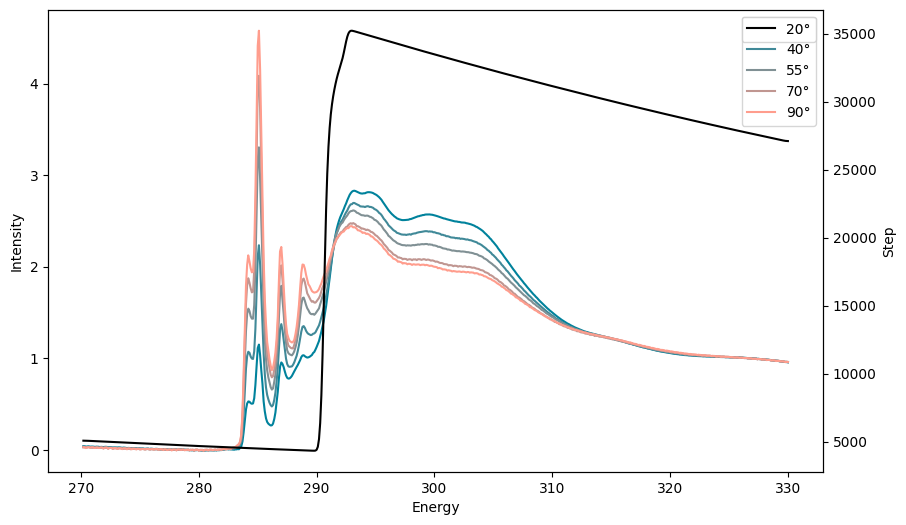

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_palette("blend:#00829c,#ff9d8d", n_colors=5)

init_df = []
angles = [20, 40, 55, 70, 90]
for i, angle in enumerate(angles):
    df = exp_df[[f"E_{angle}", f"ZnPc_{angle}"]].rename(
        columns={f"E_{angle}": "Energy", f"ZnPc_{angle}": "Intensity"}
    )
    df["Step"] = steps[f"dftStep{i + 1}_alpha62"].values
    df["Angle"] = angle
    init_df.append(df)

init_df = pd.concat(init_df, ignore_index=True)
# plot with seaborn use relplot with the color palette set to the blend of colors
fig, ax = plt.subplots(figsize=(10, 6))
second_ax = ax.twinx()
for angle in angles:
    if angle == 20:
        sns.lineplot(
            data=init_df[init_df["Angle"] == angle],
            x="Energy",
            y="Step",
            label=f"{angle}°",
            ax=second_ax,
            color="k",  # Use the first color in the blend
        )
    sns.lineplot(
        data=init_df[init_df["Angle"] == angle],
        x="Energy",
        y="Intensity",
        label=f"{angle}°",
        ax=ax,
    )

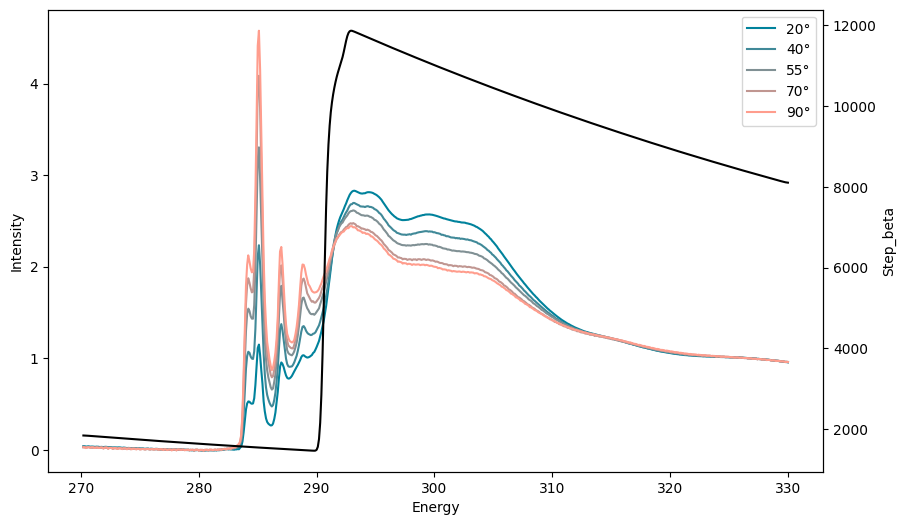

In [ ]:
from scipy.constants import h, c, e, m_e


#  Convert the step edge from mass absorption in cm^2/g to index of refraction
def mu_to_beta(step, energy, density):
    # calculate K = 2 * pi / lambda
    # where lambda = hc / E
    lambda_ = h * c / (energy * e * 1e-9)  # Convert energy from eV to J
    # Calculate K in cm^-1
    k = 2 * np.pi / lambda_
    #  Convert K to beta
    beta = step / (2 * k * density)
    return beta


# Convert the step edge to beta
init_df["Step_beta"] = mu_to_beta(
    init_df["Step"], init_df["Energy"], MATERIAL_DENSITY_G_CM3
)
# Plot the step edge
fig, ax = plt.subplots(figsize=(10, 6))
second_ax = ax.twinx()
for angle in angles:
    if angle == 20:
        sns.lineplot(
            data=init_df[init_df["Angle"] == angle],
            x="Energy",
            y="Step_beta",
            # label=f"{angle}°",
            ax=second_ax,
            color="k",  # Use the first color in the blend
        )
    sns.lineplot(
        data=init_df[init_df["Angle"] == angle],
        x="Energy",
        y="Intensity",
        label=f"{angle}°",
        ax=ax,
    )

# Normalize Experimental DFT to $\beta$



--- Normalization Diagnostics ---
Pre-edge range: (250, 280) eV
Post-edge range: (320, 340) eV
Avg Raw Pre: 1746, Avg Raw Post: 8502, Delta Raw: 6756
Avg Beta Pre: 0.0001765, Avg Beta Post: 0.000853, Delta Beta: 0.0006765
Normalization Constants: A = 1.001e-07, B = 1.697e-06
-------------------------------


--- Normalization Diagnostics ---
Pre-edge range: (250, 280) eV
Post-edge range: (320, 340) eV
Avg Raw Pre: 0.01487, Avg Raw Post: 1.007, Delta Raw: 0.9924
Avg Beta Pre: 0.0001765, Avg Beta Post: 0.000853, Delta Beta: 0.0006765
Normalization Constants: A = 0.0006816, B = 0.0001664
-------------------------------


--- Normalization Diagnostics ---
Pre-edge range: (250, 280) eV
Post-edge range: (320, 340) eV
Avg Raw Pre: 1745, Avg Raw Post: 8507, Delta Raw: 6762
Avg Beta Pre: 0.0001764, Avg Beta Post: 0.0008534, Delta Beta: 0.000677
Normalization Constants: A = 1.001e-07, B = 1.698e-06
-------------------------------


--- Normalization Diagnostics ---
Pre-edge range: (250, 280) eV

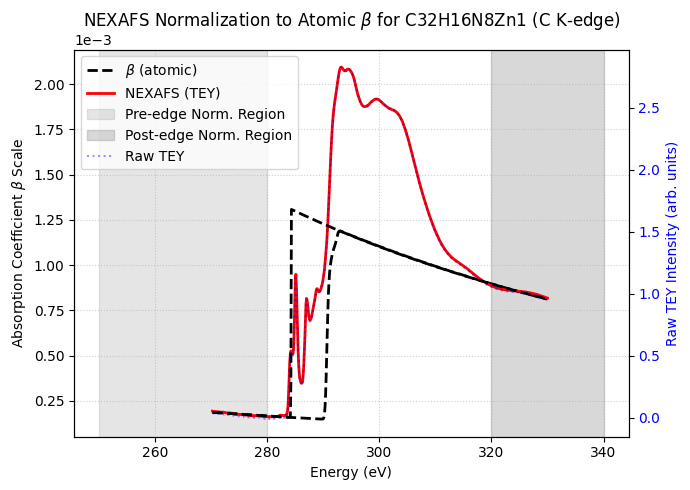

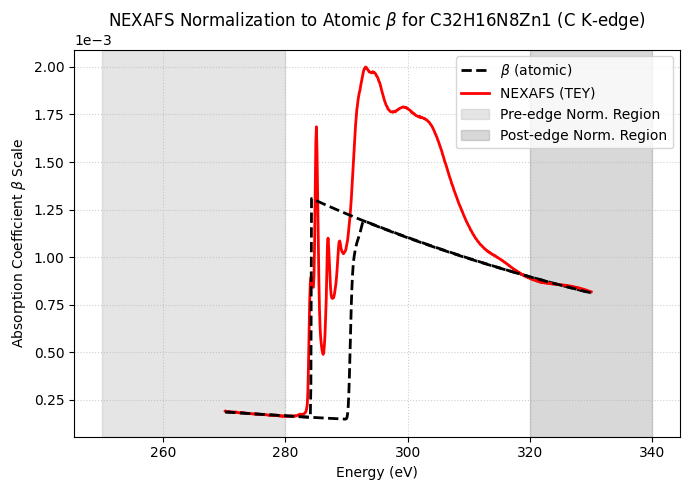

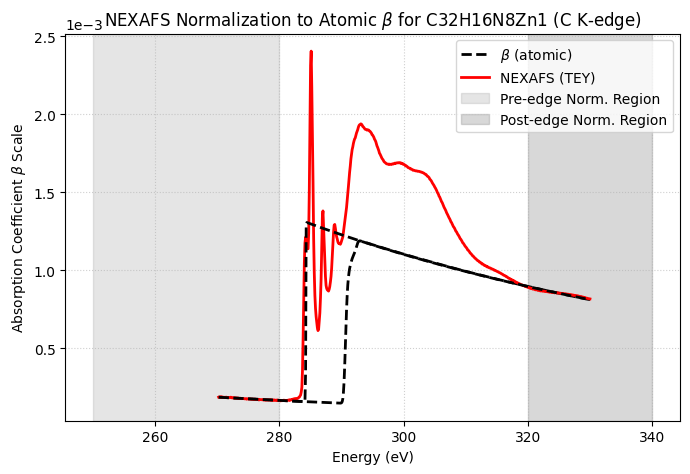

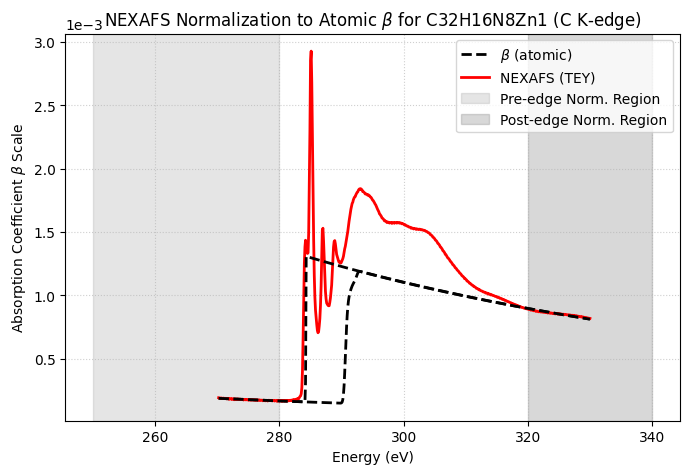

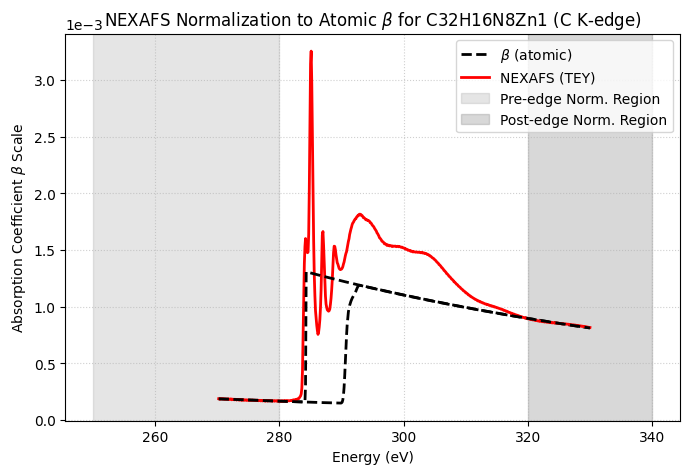

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from periodictable import xsf
from polars import col

# --- Constants and Configuration ---

# Define energy ranges for Carbon K-edge normalization (adjust as needed)
# These should be regions where the experimental spectrum is relatively flat
# before the main absorption features and well after them.
PRE_EDGE_ENERGY_RANGE_EV = (250, 280)
POST_EDGE_ENERGY_RANGE_EV = (320, 340)

# exp = exp.to_pandas()


# --- Functions ---


def calculate_atomic_beta(
    formula: str, density: float, energy_ev: pd.Series
) -> pd.Series:
    """
    Calculates the theoretical atomic absorption coefficient (beta) using periodictable.xsf.

    Args:
        formula: The chemical formula of the material.
        density: The density of the material in g/cm^3.
        energy_ev: A pandas Series containing energy values in eV.

    Returns:
        A pandas Series containing the calculated atomic beta values.
        Returns a Series of zeros if calculation fails.
    """
    energy_kev = energy_ev * 1e-3  # Convert eV to keV for periodictable
    try:
        ba = xsf.index_of_refraction(formula, density=density, energy=energy_kev)
        # Convention: n = 1 - delta - i*beta (beta > 0 for absorption)
        beta_atomic = -ba.imag
        if np.all(beta_atomic <= 0) and np.any(energy_kev > 0.01):
            beta_atomic = ba.imag
            print(
                "Info: Assuming n = 1 - delta + i*beta convention for periodictable.xsf."
            )
        beta_atomic[beta_atomic < 0] = 0
        return pd.Series(beta_atomic, index=energy_ev.index)

    except Exception as e:
        print(f"Error calculating index of refraction: {e}")
        return pd.Series(np.zeros_like(energy_ev), index=energy_ev.index)


def normalize_nexafs_to_beta(
    exp_data: pd.DataFrame,
    beta_atomic: pd.Series,
    pre_edge_range: tuple[float, float],
    post_edge_range: tuple[float, float],
) -> tuple:
    """
    Normalizes experimental NEXAFS data to match atomic beta in pre/post edge regions.

    Args:
        exp_data: DataFrame with 'Energy' and 'Intensity' columns.
        beta_atomic: Series with calculated atomic beta, indexed like exp_data['Energy'].
        pre_edge_range: Tuple (min_eV, max_eV) for the pre-edge normalization region.
        post_edge_range: Tuple (min_eV, max_eV) for the post-edge normalization region.

    Returns:
        A tuple containing:
            - normalized_intensity: pandas Series with the normalized NEXAFS data.
            - A: The scaling factor.
            - B: The offset factor.
    Raises:
        ValueError: If normalization ranges are invalid or lead to division by zero.
    """
    energy = exp_data["Energy"]
    raw_intensity = exp_data["Intensity"]

    pre_mask = (energy >= pre_edge_range[0]) & (energy <= pre_edge_range[1])
    post_mask = (energy >= post_edge_range[0]) & (energy <= post_edge_range[1])

    if not pre_mask.any() or not post_mask.any():
        raise ValueError(
            "Pre-edge or post-edge energy range did not match any data points. Adjust ranges."
        )

    avg_raw_pre = raw_intensity[pre_mask].mean()
    avg_raw_post = raw_intensity[post_mask].mean()

    beta_atomic_aligned = beta_atomic.reindex(raw_intensity.index).fillna(0)

    avg_beta_pre = beta_atomic_aligned[pre_mask].mean()
    avg_beta_post = beta_atomic_aligned[post_mask].mean()

    delta_raw = avg_raw_post - avg_raw_pre
    if np.abs(delta_raw) < 1e-9:
        raise ValueError(
            "Raw NEXAFS data has nearly identical pre/post-edge averages. Check data or ranges."
        )

    delta_beta = avg_beta_post - avg_beta_pre

    A = delta_beta / delta_raw
    B = avg_beta_pre - A * avg_raw_pre

    normalized_intensity = A * raw_intensity + B

    print("\n--- Normalization Diagnostics ---")
    print(f"Pre-edge range: {pre_edge_range} eV")
    print(f"Post-edge range: {post_edge_range} eV")
    print(
        f"Avg Raw Pre: {avg_raw_pre:.4g}, Avg Raw Post: {avg_raw_post:.4g}, Delta Raw: {delta_raw:.4g}"
    )
    print(
        f"Avg Beta Pre: {avg_beta_pre:.4g}, Avg Beta Post: {avg_beta_post:.4g}, Delta Beta: {delta_beta:.4g}"
    )
    print(f"Normalization Constants: A = {A:.4g}, B = {B:.4g}")
    print("-------------------------------\n")

    return normalized_intensity, A, B


def plot_normalized_nexafs(
    energy: pd.Series,
    normalized_intensity: pd.Series,
    beta_atomic: pd.Series,
    pre_edge_range: tuple[float, float],
    post_edge_range: tuple[float, float],
    formula: str,
    raw_intensity: pd.Series | None = None,
):
    """
    Generates a plot comparing normalized NEXAFS data and atomic beta.

    Args:
        energy: Series with energy values.
        normalized_intensity: Series with normalized experimental data.
        beta_atomic: Series with calculated atomic beta.
        pre_edge_range: Tuple (min_eV, max_eV) for shading pre-edge region.
        post_edge_range: Tuple (min_eV, max_eV) for shading post-edge region.
        formula: Chemical formula for the plot title.
        raw_intensity: Optional Series with raw experimental data for secondary axis.
    """
    fig, ax = plt.subplots(figsize=(7, 5))

    ax.plot(
        energy,
        beta_atomic,
        label=r"$\beta$ (atomic)",
        color="black",
        linewidth=2,
        linestyle="--",
    )
    ax.plot(
        energy,
        normalized_intensity,
        label="NEXAFS (TEY)",
        color="red",
        linewidth=2,
    )

    # Correctly unpack the tuples for axvspan - it expects xmin, xmax parameters
    ax.axvspan(
        pre_edge_range[0],
        pre_edge_range[1],
        color="grey",
        alpha=0.2,
        label="Pre-edge Norm. Region",
    )
    ax.axvspan(
        post_edge_range[0],
        post_edge_range[1],
        color="grey",
        alpha=0.3,
        label="Post-edge Norm. Region",
    )

    ax.set_xlabel("Energy (eV)")
    ax.set_ylabel(r"Absorption Coefficient $\beta$ Scale")
    ax.set_title(f"NEXAFS Normalization to Atomic $\\beta$ for {formula} (C K-edge)")
    ax.grid(True, linestyle=":", alpha=0.6)

    # Set y-axis to use scientific notation
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))

    handles, labels = ax.get_legend_handles_labels()

    if raw_intensity is not None:
        ax2 = ax.twinx()
        (line2,) = ax2.plot(
            energy,
            raw_intensity,
            label="Raw TEY",
            color="blue",
            alpha=0.4,
            linestyle=":",
        )
        ax2.set_ylabel("Raw TEY Intensity (arb. units)", color="blue")
        ax2.tick_params(axis="y", labelcolor="blue")
        handles.append(line2)
        labels.append("Raw TEY")

    ax.legend(handles, labels, loc="best")
    plt.tight_layout()
    return ax


final_df = init_df.copy()
# Normalize to the steps
for angle in angles:
    df = init_df[init_df["Angle"] == angle]
    energy = df["Energy"]
    intensity = df["Intensity"]

    # Calculate atomic beta
    beta_atomic = calculate_atomic_beta(ZNPC_FORMULA, MATERIAL_DENSITY_G_CM3, energy)
    step = df["Step_beta"]
    # Normalize the step
    _step_df = (
        df[["Energy", "Step_beta"]]
        .dropna()
        .rename(columns={"Energy": "Energy", "Step_beta": "Intensity"})
    )
    normalized_step, A, B = normalize_nexafs_to_beta(
        _step_df,
        beta_atomic,
        PRE_EDGE_ENERGY_RANGE_EV,
        POST_EDGE_ENERGY_RANGE_EV,
    )
    step = normalized_step
    normalized_intensity, A, B = normalize_nexafs_to_beta(
        df,
        step,
        PRE_EDGE_ENERGY_RANGE_EV,
        POST_EDGE_ENERGY_RANGE_EV,
    )

    final_df.loc[final_df["Angle"] == angle, "Normalized Intensity"] = (
        normalized_intensity
    )
    # Plot the results
    ax = plot_normalized_nexafs(
        energy,
        normalized_intensity,
        step,
        PRE_EDGE_ENERGY_RANGE_EV,
        POST_EDGE_ENERGY_RANGE_EV,
        ZNPC_FORMULA,
        raw_intensity=intensity
        if angle == 20
        else None,  # Only show raw for first angle
    )
    ax.plot(
        energy,
        beta_atomic,
        label=r"$\beta$ (atomic)",
        color="black",
        linewidth=2,
        linestyle="--",
    )


--- Normalization Diagnostics ---
Pre-edge range: (250, 280) eV
Post-edge range: (320, 340) eV
Avg Raw Pre: 1746, Avg Raw Post: 8502, Delta Raw: 6756
Avg Beta Pre: 0.0001765, Avg Beta Post: 0.000853, Delta Beta: 0.0006765
Normalization Constants: A = 1.001e-07, B = 1.695e-06
-------------------------------



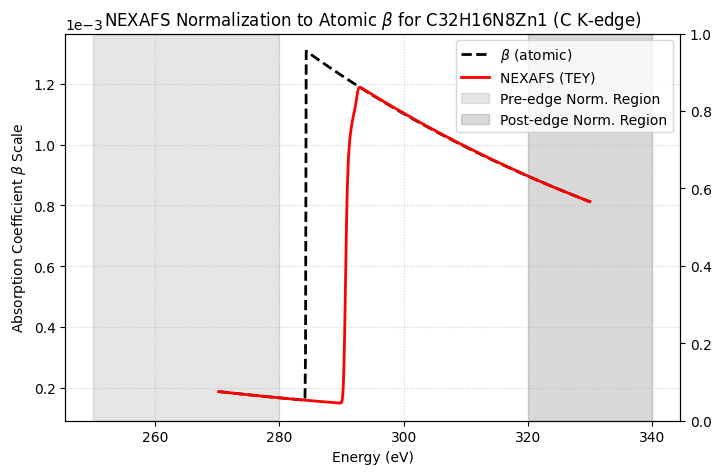

In [ ]:
_step_df = (
    df[["Energy", "Step_beta"]]
    .dropna()
    .rename(columns={"Energy": "Energy", "Step_beta": "Intensity"})
)
normalized_step, A, B = normalize_nexafs_to_beta(
    _step_df,
    beta_atomic,
    PRE_EDGE_ENERGY_RANGE_EV,
    POST_EDGE_ENERGY_RANGE_EV,
)
ax = plot_normalized_nexafs(
    _step_df["Energy"],
    normalized_step,
    beta_atomic,
    PRE_EDGE_ENERGY_RANGE_EV,
    POST_EDGE_ENERGY_RANGE_EV,
    ZNPC_FORMULA,
    raw_intensity=None,  # No raw intensity for step edge
)
ax_mu = ax.twinx()


# Putting it all together


In [ ]:
final_df

,Energy,Intensity,Step,Angle,Step_beta,Normalized Intensity
0,270.19992,0.039316,5061.9155,20,1848.358247,0.000193
1,270.30038,0.038350,5061.1460,20,1847.390407,0.000193
2,270.40048,0.035504,5058.9800,20,1845.916190,0.000191
3,270.50085,0.034431,5055.7681,20,1844.059738,0.000190
4,270.60025,0.037773,5051.9160,20,1841.977843,0.000192
...,...,...,...,...,...,...
2990,329.60010,0.964419,27136.3870,90,8123.088111,0.000820
2991,329.70013,0.963265,27120.0840,90,8115.744882,0.000820
2992,329.79932,0.957214,27106.5180,90,8109.245567,0.000815
2993,329.90030,0.960424,27097.3810,90,8104.030780,0.000818


In [ ]:
from scipy.interpolate import interp1d

sns.set_palette("blend:#00829c,#ff9d8d", n_colors=12)


ip_function = interp1d(energy, normalized_step, bounds_error=False)

fig, ax = plt.subplots(figsize=(8, 8))


def dft_nexafs(
    clusters, widths, amplitudes, ip_function=None, ax: plt.Axes | None = None
):
    avg = []
    ip = (
        ip_function(energy_range)
        if ip_function is not None
        else np.zeros_like(energy_range)
    )
    for i, e in enumerate(clusters):
        pk = peak(energy_range, e, widths[i], amplitudes[i])
        avg.append(pk)
        if ax is not None:
            ax.fill_between(
                energy_range,
                pk.real / len(clusters) + ip,
                ip,
                alpha=0.7,
                edgecolor="white",
                # label=f"{e}",
            )

    avg = sum(avg) / len(clusters)
    avg += ip
    return avg


avg = dft_nexafs(clusters, wid, amp, ip_function, ax)
# determine the scaling factor for the experimental data

ax.plot(
    energy_range,
    np.sqrt(avg),
    label="DFT",
    color="r",
    linestyle="-",
    linewidth=2,
    zorder=10,
)
ax.plot(
    energy_range,
    ip_function(energy_range),
    label="IP",
    color="b",
    linestyle="--",
    linewidth=2,
)
line_styles = ["-", "--", "-.", (0, (5, 5)), (0, (3, 5, 1, 5))][::-1]
for i, angle in enumerate(angles):
    g = final_df[final_df["Angle"] == angle]
    ax.plot(
        g["Energy"],
        g["Normalized Intensity"],
        label=f"EXP {angle}°",
        linewidth=1 if angle != 90 else 3,
        color="k",
        ls=line_styles[i % 5],
        zorder=0,
    )
ax.set_xlim(283, 298)
ax.set_ylabel(r"Absorption Coefficient $\beta$ Scale")
ax.set_xlabel("Energy (eV)")
ax.set_title(r"NEXAFS Normalization to Atomic $\beta$ (C K-edge)")
ax.grid(True, linestyle=":", alpha=0.6)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
plt.legend()


NameError: name 'sns' is not defined